In [2]:
#Importo librerías
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
import pandas

In [3]:
#Defino M a partir de los datos en el .csv
M = pandas.read_csv('catalogo.csv').values
#M=np.loadtxt('catalogo.csv', delimiter=',', unpack=True)
#M=np.genfromtxt('catalogo.csv', delimiter=',', dtype=None)

In [4]:
P = M[:,11]     #Defino período y excentricidad
e = M[:,17]
P=P.astype(float)         #Identificar al vector P como vector de numeros. identifica nan
e=e.astype(float)

In [5]:
np.size(P)

4217

/store/lu/clase/python_env/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/store/lu/clase/python_env/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


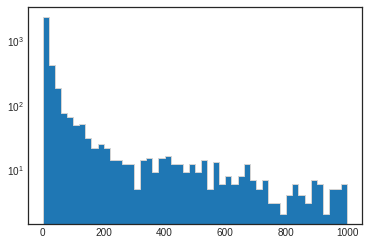

In [6]:
#Histograma períodos reduje el rango despreciando las pocas frecuencias
plt.hist(P, edgecolor='lightgrey', bins=50, histtype='stepfilled', range=(0.03, 1000));
plt.yscale('log')

/store/lu/clase/python_env/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/store/lu/clase/python_env/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


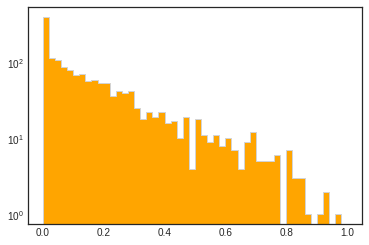

In [7]:
#Histograma excetricidades reduje el rango despreciando las pocas frecuencias
plt.hist(e, edgecolor='lightgrey', bins=50, color='orange', histtype='stepfilled', range=(0, 1));
plt.yscale('log')

In [8]:
import matplotlib.colors as colors

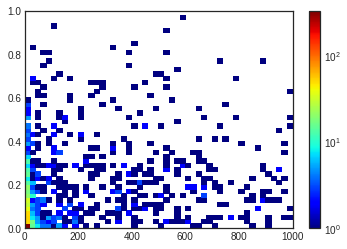

In [9]:
#Ahora el histograma 2D, limitando mucho el rango.
plt.hist2d(P, e, bins=(50, 50), range=[[0, 1000], [0, 1]],  cmap='jet', norm=colors.LogNorm());
plt.colorbar()


In [10]:
lP =np.log10(P) #quiero el log del periodo

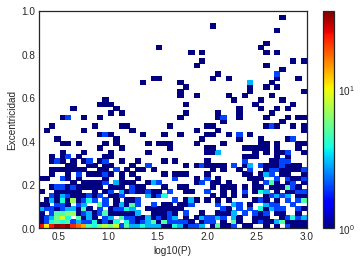

In [11]:
plt.hist2d(lP, e, bins=(50, 50), range=[[np.log10(2), np.log10(1000)], [0, 1]],  cmap='jet', norm=colors.LogNorm());
cb = plt.colorbar()
plt.xlabel('log10(P)')
plt.ylabel('Excentricidad')

plt.savefig('hist2dlog.pdf')

In [14]:
from scipy.stats import gaussian_kde

lP =np.log10(P) #quiero el log del periodo
le =np.log10(e) #quiero el log del periodo
lP=lP.astype(float)         #Identificar al vector P como vector de numeros. identifica nan
le=le.astype(float)

data = np.vstack([lP, le])
kde = gaussian_kde(data)



/store/lu/clase/python_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


ValueError: array must not contain infs or NaNs

In [ ]:
xgrid = np.logspace(1, 5, 10)
ygrid = np.linspace(0, 1, 10)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(),Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[0, 5, 0, 1], cmap='Blues')
cb = plt.colorbar()
cb.set_label('Densidad')


In [23]:
#Veo si en verdad hay nan's
P

array([3.260300e+02, 7.300000e+05, 5.162200e+02, ..., 1.281439e+03,
       3.848860e+03,          nan])

In [25]:
lP

array([2.51325756, 5.86332286, 2.71283483, ..., 3.10769794, 3.58533211,
              nan])

In [ ]:
#Si los hay todavía...